In [ ]:
#Description: This program optimizes a users portfolio using the Efficent Frontier & Python: 
#Portfolio Optimization is the process of selectiing the best portfolio out of set of portolios being considered
#Objective expected return and mimimises cost of Financial Risk

In [ ]:
#Import the python libraries 
from pandas_datareader import data as web 
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock symbols/tickers in the portfolio 
#FAANG (5 most popular and best peforming american tech companies )

assets = ['FB', 'AMZN', 'AAPL', 'NFLX',  'GOOG',]


In [ ]:
#Assign weights to the stocks (weights should = 1) (20% of our portfolio is in each of the FAANG stocks listed above)
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
#Get the stock/portfolio starting date 
stockStartDate = '2015-01-01'

In [ ]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-10'

In [ ]:
pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-co19c3t6
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-co19c3t6


In [ ]:
#Create a dataframe to store the adjusted close price of the stocks 
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [ ]:
#Show the data frame
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,24.714510,49.848572,523.373108
2015-01-05,77.190002,302.190002,24.018265,47.311428,512.463013
2015-01-06,76.150002,295.290009,24.020517,46.501431,500.585632
2015-01-07,76.150002,298.420013,24.357342,46.742859,499.727997
2015-01-08,78.180000,300.459991,25.293203,47.779999,501.303680
...,...,...,...,...,...
2022-04-04,233.889999,3366.929932,178.440002,391.500000,2872.850098
2022-04-05,231.839996,3281.100098,175.059998,380.149994,2821.260010
2022-04-06,223.300003,3175.120117,171.830002,368.350006,2743.520020


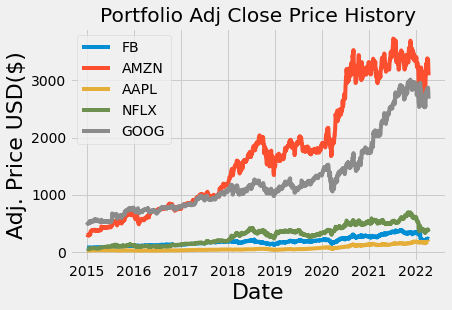

In [ ]:
#Visually show the stock / portfolio 
title = 'Portfolio Adj Close Price History'

#Get the stocks 
my_stocks = df

#Create and plot the graph 
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Adj. Price USD($)', fontsize = 22)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()


In [ ]:
#Show the daily simple return 
#Returns caclualted by taking the new price / old price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
...,...,...,...,...,...
2022-04-04,0.040205,0.029264,0.023693,0.048277,0.020913
2022-04-05,-0.008765,-0.025492,-0.018942,-0.028991,-0.017958
2022-04-06,-0.036836,-0.032300,-0.018451,-0.031040,-0.027555


In [ ]:
#Create and show the annuzalized covariance matrix 
#Covairance matrix ix a mathematical concept used to determine how much two random variables vary or move together 
#Directional relationship between two assets or two asset prices 
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.112029,0.060821,0.053856,0.063583,0.058356
AMZN,0.060821,0.095660,0.049805,0.069023,0.052938
AAPL,0.053856,0.049805,0.084393,0.050890,0.047251
NFLX,0.063583,0.069023,0.050890,0.179586,0.053996
GOOG,0.058356,0.052938,0.047251,0.053996,0.072025


In [ ]:
#Caclulate the portfolio varaince 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06658926985497647

In [ ]:
#Calclate the portfolio volatility
#Aka the standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2580489679401498

In [ ]:
#Calculate the annual portfolio return 
portfolioSimpleAnnualreturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualreturn

0.29889954720261624

In [ ]:
#Show the expected annual return, volatitity (risk), and variance 
percent_var = str (round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualreturn, 2) *100) + '%'

print('Expected annual return:'  + percent_ret)
print('Annual volatility/risk ' + percent_vols)
print('Annual variance:' + percent_var)

Expected annual return:30.0%
Annual volatility/risk 26.0%
Annual variance:7.000000000000001%


In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#Portfolio Optimization !

#Calculate the expected returns and the annualized saple covariance matrix of asset returns 

mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

#Optimize for max sharpe ratio 
#Created from William Sharpe 
#Measures the peformance of an investment compared to investments that are risk free (bonds, treasury bills)

ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
clean_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.60164), ('AAPL', 0.36884), ('NFLX', 0.0168), ('GOOG', 0.01272)])
Expected annual return: 34.5%
Annual volatility: 26.8%
Sharpe Ratio: 1.22


(0.3452726944696724, 0.26753750129146425, 1.215802244169536)